In [7]:
import pandas as pd
import numpy as np
import math

In [8]:
df = pd.read_csv("E:/Codes/Jupyter/Datasets/bmd.csv")
df.head(5)

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [9]:
################
# Cleaning Data
###############

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['fracture'] = labelencoder.fit_transform(df['fracture'])+1
df['medication'] = labelencoder.fit_transform(df['medication'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df = df.drop(['id'],axis = 1)
df

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,0,2,64.0,155.5,0,18,0.8793
1,75.741225,0,2,78.0,162.0,2,56,0.7946
2,70.778900,1,2,73.0,170.5,2,10,0.9067
3,78.247175,0,2,60.0,148.0,2,14,0.7112
4,54.191877,1,2,55.0,161.0,2,20,0.7909
...,...,...,...,...,...,...,...,...
164,77.982543,1,1,74.0,164.0,2,49,0.7941
165,50.285303,0,1,59.0,161.0,2,6,0.7971
166,46.359721,1,1,67.0,169.0,2,10,0.8037
167,54.788368,1,1,70.0,166.0,2,14,0.8072


In [10]:
##########################
# Mean & Sigma Calculations
##########################

frac = df[df['fracture']==1].loc[:,['bmd']].values
frac_mean = round(np.mean(frac),6)
no_frac = df[df['fracture']==2].loc[:,['bmd']].values
no_frac_mean = round(np.mean(no_frac),6)

count = 0
for i in range(len(frac)):
    count += (frac[i] - frac_mean)**2
for j in range(len(no_frac)):
    count += (no_frac[j] - no_frac_mean)**2
sigma = math.sqrt((count)/(len(df)-2))
sigma = round(sigma,6)

In [11]:
print(frac_mean,no_frac_mean,sigma)

0.623308 0.850245 0.130539


In [12]:
prob_frac = len(frac)/len(df)
prob_no_frac = len(no_frac)/len(df)

data = {'Fracture':[prob_frac],
        'No fracture':[prob_no_frac]}
  
# Create DataFrame
df_prob = pd.DataFrame(data)
df_prob

,Fracture,No fracture
0,0.295858,0.704142


In [13]:
#for fracture
0.54*frac_mean/sigma**2 - frac_mean**2/(2*sigma**2) + math.log(df_prob["Fracture"])

#for no fracture
0.54*no_frac_mean/sigma**2 - no_frac_mean**2/(2*sigma**2) + math.log(df_prob["No fracture"])

5.381123386450154

In [14]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# normalise age
array_1d = df['age'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['age']= normalized_array_1d

# normalise weight
array_1d = df['weight_kg'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['weight_kg']= normalized_array_1d

# normalise height
array_1d = df['height_cm'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['height_cm'] = normalized_array_1d

# normalise height
array_1d = df['height_cm'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['height_cm'] = normalized_array_1d

# normalise waiting time
array_1d = df['medication'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['medication']= normalized_array_1d

# normalise waiting time
array_1d = df['waiting_time'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['waiting_time']= normalized_array_1d

# normalise bmd
array_1d = df['bmd'] 
range_to_normalize = (0,1)
normalized_array_1d = normalize(array_1d, 
                                range_to_normalize[0], 
                                range_to_normalize[1])
df['bmd']= normalized_array_1d

In [15]:
df['age']= df['age'].round(4)
df['weight_kg']= df['weight_kg'].round(4)
df['height_cm']= df['height_cm'].round(4)
df['medication']= df['medication'].round(4)
df['waiting_time']= df['waiting_time'].round(4)
df['bmd']= df['bmd'].round(4)

In [16]:
df

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,0.4012,0,2,0.4667,0.3857,0.0,0.1429,0.4940
1,0.7542,0,2,0.7000,0.5714,1.0,0.5604,0.4053
2,0.6605,1,2,0.6167,0.8143,1.0,0.0549,0.5227
3,0.8015,0,2,0.4000,0.1714,1.0,0.0989,0.3180
4,0.3471,1,2,0.3167,0.5429,1.0,0.1648,0.4014
...,...,...,...,...,...,...,...,...
164,0.7965,1,1,0.6333,0.6286,1.0,0.4835,0.4048
165,0.2734,0,1,0.3833,0.5429,1.0,0.0110,0.4079
166,0.1992,1,1,0.5167,0.7714,1.0,0.0549,0.4149
167,0.3584,1,1,0.5667,0.6857,1.0,0.0989,0.4185


In [17]:
X = df.iloc[:,[0,3,4,7]].values
y = df['fracture'].values

In [18]:
%matplotlib inline

In [19]:
label_dict = {1: 'no fracture', 2: 'fracture'}
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('Age',
                  'Weight in Kg',
                  'Height in cm',
                  'Bmd'))}

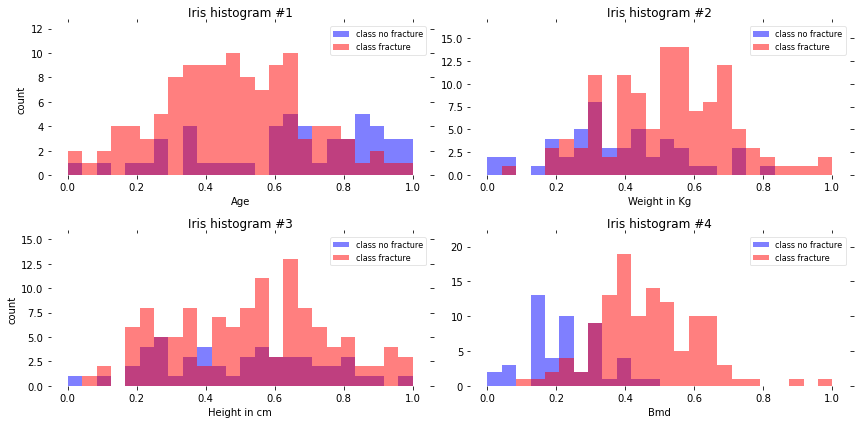

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()


In [21]:
np.set_printoptions(precision=3)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [0.641 0.374 0.494 0.226]

Mean Vector class 2: [0.477 0.522 0.533 0.464]



In [22]:
np.mean(X[y==2], axis=0)

array([0.477, 0.522, 0.533, 0.464])

In [23]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 8.198  0.156 -1.685 -0.719]
 [ 0.156  5.44   2.488  1.893]
 [-1.685  2.488  8.566  1.826]
 [-0.719  1.893  1.826  3.122]]


In [24]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 0.955 -0.859 -0.227 -1.378]
 [-0.859  0.772  0.204  1.239]
 [-0.227  0.204  0.054  0.327]
 [-1.378  1.239  0.327  1.989]]


In [25]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.822]
 [-0.064]
 [ 0.128]
 [-0.551]]
Eigenvalue 1: -1.11e-16

Eigenvector 2: 
[[ 0.211]
 [-0.111]
 [ 0.219]
 [-0.946]]
Eigenvalue 2: 7.68e-01

Eigenvector 3: 
[[ 0.263]
 [-0.141]
 [ 0.948]
 [ 0.114]]
Eigenvalue 3: 4.35e-18

Eigenvector 4: 
[[ 0.289]
 [-0.714]
 [ 0.058]
 [ 0.635]]
Eigenvalue 4: -3.90e-17


In [26]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.7677719094794241
1.1102230246251565e-16
3.9031003209128436e-17
4.353784769936629e-18


In [28]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [29]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.211 -0.822]
 [-0.111 -0.064]
 [ 0.219  0.128]
 [-0.946 -0.551]]


In [30]:
X_lda = X.dot(W)
assert X_lda.shape == (169,2), "The matrix is not 169x2 dimensional."

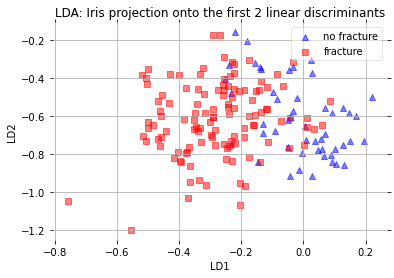

In [31]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [33]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label] * -1,
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

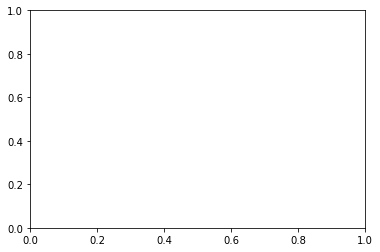

In [34]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')